In [6]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data_ori = pd.read_csv("train_data_mod.csv")

In [9]:
data_copy = data_ori.copy()
data_copy.dtypes


temperature                int64
density                    int64
resp_density             float64
metal_Ce                   int64
metal_Er                   int64
metal_Eu                   int64
metal_Gd                   int64
metal_Ho                   int64
metal_In2O3                int64
metal_La                   int64
metal_Nd                   int64
metal_Pd                   int64
metal_Pr                   int64
metal_Pt                   int64
metal_Rh                   int64
metal_Ru                   int64
metal_Sb                   int64
metal_Sm                   int64
metal_TiO2                 int64
metal_WO3                  int64
metal_Y                    int64
metal_Yb                   int64
metal_ox_In2O3             int64
metal_ox_TiO2              int64
metal_ox_wo3               int64
gas_cate_benzene           int64
gas_cate_ch4               int64
gas_cate_diesel_fuel       int64
gas_cate_formaldehyde      int64
gas_cate_gasoline          int64
gas_cate_h

In [10]:
data_ori

,temperature,density,resp_density,metal_Ce,metal_Er,metal_Eu,metal_Gd,metal_Ho,metal_In2O3,metal_La,...,metal_ox_wo3,gas_cate_benzene,gas_cate_ch4,gas_cate_diesel_fuel,gas_cate_formaldehyde,gas_cate_gasoline,gas_cate_h2,gas_cate_toluene,gas_cate_xylene,resp_val
0,200,100,0.005,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1.2
1,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.3
2,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.6
3,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.8
4,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10505,200,50,0.005,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1.4
10506,200,50,0.005,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1.1
10507,200,50,0.005,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1.1
10508,200,50,0.005,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1.1


In [11]:
cols = list(data_copy.head())
col_x = cols[:-1]
col_y = [cols[-1]]
print(col_x)
print(col_y)

['temperature', 'density', 'resp_density', 'metal_Ce', 'metal_Er', 'metal_Eu', 'metal_Gd', 'metal_Ho', 'metal_In2O3', 'metal_La', 'metal_Nd', 'metal_Pd', 'metal_Pr', 'metal_Pt', 'metal_Rh', 'metal_Ru', 'metal_Sb', 'metal_Sm', 'metal_TiO2', 'metal_WO3', 'metal_Y', 'metal_Yb', 'metal_ox_In2O3', 'metal_ox_TiO2', 'metal_ox_wo3', 'gas_cate_benzene', 'gas_cate_ch4', 'gas_cate_diesel_fuel', 'gas_cate_formaldehyde', 'gas_cate_gasoline', 'gas_cate_h2', 'gas_cate_toluene', 'gas_cate_xylene']
['resp_val']


In [12]:
data_copy.isnull().values.any()

True

In [13]:
nan_row = data_copy[data_copy.isna().any(axis=1)]
nan_row

,temperature,density,resp_density,metal_Ce,metal_Er,metal_Eu,metal_Gd,metal_Ho,metal_In2O3,metal_La,...,metal_ox_wo3,gas_cate_benzene,gas_cate_ch4,gas_cate_diesel_fuel,gas_cate_formaldehyde,gas_cate_gasoline,gas_cate_h2,gas_cate_toluene,gas_cate_xylene,resp_val
5960,200,200,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
5973,200,200,0.004,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
5986,200,200,0.003,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
5999,200,200,0.002,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN


In [14]:
data_copy = data_copy.dropna()

In [15]:
# data_copy=data_copy.drop(data_copy[data_copy.resp_val <= 1.2].index)


In [16]:
x_data = data_copy[col_x]
y_data = data_copy[col_y]

In [17]:
x_data  

,temperature,density,resp_density,metal_Ce,metal_Er,metal_Eu,metal_Gd,metal_Ho,metal_In2O3,metal_La,...,metal_ox_TiO2,metal_ox_wo3,gas_cate_benzene,gas_cate_ch4,gas_cate_diesel_fuel,gas_cate_formaldehyde,gas_cate_gasoline,gas_cate_h2,gas_cate_toluene,gas_cate_xylene
0,200,100,0.005,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,200,100,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10505,200,50,0.005,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10506,200,50,0.005,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
10507,200,50,0.005,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10508,200,50,0.005,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [18]:
y_data

,resp_val
0,1.2
1,1.3
2,1.6
3,1.8
4,1.3
...,...
10505,1.4
10506,1.1
10507,1.1
10508,1.1


In [19]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [21]:
y_train

,resp_val
3412,1.0
617,1.8
6225,1.1
7024,1.3
745,1.9
...,...
5734,2.9
5191,11.0
5390,1.1
860,2.6


In [41]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor().fit(X_train, y_train)

d:\Apps\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
x_test_res = regr.predict(X_test)


In [43]:
regr.score(X_test, y_test)

0.10059724215723254

In [44]:
y_test_np = y_test["resp_val"].to_numpy()

In [45]:
y_test

,resp_val
33,1.5
9636,7.4
5009,1.0
4404,1.0
4626,1.0
...,...
2485,2.8
9050,19.9
7857,1.2
9139,25.4


In [46]:
y_test_np-x_test_res

array([ -1.93806476,  -8.89669205, -32.55956725, ...,  -0.33093363,
       -17.53861824,  -4.09049938])

In [47]:
param_grid = {
    'hidden_layer_sizes': [ (50, 50),(100, 50),(100, 50, 25)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd','adam'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create an MLPRegressor object
mlp = MLPRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)


d:\Apps\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Apps\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Apps\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Apps\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [ ]:
grid_search.best_score_

0.561230913757371

In [ ]:
grid_search.best_estimator_.score(X_train,y_train)

0.4832616817560599

In [ ]:
y_test_res=grid_search.best_estimator_.predict(X_test)

In [ ]:
# rms = mean_squared_error(y_test_np, x_test_res, squared=False)
rmse(y_test_res, y_test)

24.402232829104292

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
LR = LinearRegression()


In [ ]:
LR.fit(X_train,y_train)


LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test)
y_prediction

array([[-1.90021324],
       [ 7.86873436],
       [22.0429821 ],
       ...,
       [-6.88088036],
       [20.59788895],
       [ 3.36823845]])

In [ ]:
rms = mean_squared_error(y_test_np, y_prediction, squared=False)
rms

16.448542024081576

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test_np,y_prediction)
score

0.2890170372695867

In [58]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# X, y = make_regression(n_features=4, n_informative=2,
#                        random_state=0, shuffle=False)


In [ ]:
regr = RandomForestRegressor(max_depth=15, random_state=2)
regr.fit(X_train, y_train)
regr.score(X_train, y_train)

C:\Users\qin95\AppData\Local\Temp\ipykernel_23768\159139388.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


0.9647483937892027

In [ ]:
y_pre = regr.predict(X_test)

In [ ]:
rms = mean_squared_error(y_test_np, y_pre, squared=False)
rms

7.357057644888274

In [ ]:
y_test

,resp_val
33,1.5
9636,7.4
5009,1.0
4404,1.0
4626,1.0
...,...
2485,2.8
9050,19.9
7857,1.2
9139,25.4


In [ ]:

print(y_test_np)

[ 1.5  7.4  1.  ...  1.2 25.4  2. ]


In [ ]:
print(y_pre)

[ 1.45353467  5.02618935  1.184      ...  1.09969762 20.05648783
  2.10751855]


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
X_test

,temperature,density,resp_density,metal_Ce,metal_Er,metal_Eu,metal_Gd,metal_Ho,metal_In2O3,metal_La,...,metal_ox_TiO2,metal_ox_wo3,gas_cate_benzene,gas_cate_ch4,gas_cate_diesel_fuel,gas_cate_formaldehyde,gas_cate_gasoline,gas_cate_h2,gas_cate_toluene,gas_cate_xylene
33,200,100,0.003,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9636,200,300,0.003,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5009,150,1000,0.004,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4404,200,100,0.005,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4626,50,100,0.003,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,400,50,0.003,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9050,1000,350,0.003,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7857,100,50,0.001,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9139,1000,300,0.005,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

X_train_p = X_train_p.to_numpy()
X_test_p = X_test_p.to_numpy()
y_train_p = y_train_p.to_numpy()
y_test_p = y_test_p.to_numpy()

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train_p)

In [ ]:
X_scaled_train = scaler.transform(X_train_p)
X_scaled_test = scaler.transform(X_test_p)


In [ ]:
regr = RandomForestRegressor(max_depth=15, random_state=2)
regr.fit(X_train, y_train)
# regr.score(X_scaled_test, y_train)

C:\Users\qin95\AppData\Local\Temp\ipykernel_23768\4166927877.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, random_state=2)

In [ ]:
regr.score(X_train, y_train)

0.9647483937892027

In [104]:

from sklearn.model_selection import GridSearchCV
import sklearn.metrics

model = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [10, 50,100],
    'random_state':[2,4,6],
    'max_depth': [ 5, 10, 15],
    'min_samples_split': [5,10,15],
    'min_samples_leaf': [2, 4, 6]
}
grid_search = GridSearchCV(model, param_grid, scoring="r2", cv=5, verbose=10)
grid_search.fit(X_train, y_train)

# Print the best hyperparametersprint(grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 1/5; 1/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.711 total time=   0.0s
[CV 2/5; 1/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 2/5; 1/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.730 total time=   0.0s
[CV 3/5; 1/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 3/5; 1/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.702 total time=   0.0s
[CV 4/5; 1/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 4/5; 1/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 1/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.549 total time=   0.0s
[CV 1/5; 2/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4
[CV 1/5; 2/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.704 total time=   0.0s
[CV 2/5; 2/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4
[CV 2/5; 2/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.701 total time=   0.0s
[CV 3/5; 2/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4
[CV 3/5; 2/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.637 total time=   0.0s
[CV 4/5; 2/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4
[CV 4/5; 2/2

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 4/5; 3/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6;, score=0.385 total time=   0.0s
[CV 5/5; 3/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6
[CV 5/5; 3/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6;, score=0.579 total time=   0.0s
[CV 1/5; 4/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 4/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.711 total time=   0.1s
[CV 2/5; 4/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2
[CV 2/5; 4/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.720 total time=   0.1s
[CV 3/5; 4/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 4/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.667 total time=   0.1s
[CV 4/5; 4/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2
[CV 4/5; 4/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.461 total time=   0.1s
[CV 5/5; 4/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 4/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.576 total time=   0.1s
[CV 1/5; 5/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 5/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.702 total time=   0.1s
[CV 2/5; 5/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4
[CV 2/5; 5/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.709 total time=   0.1s
[CV 3/5; 5/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 5/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.646 total time=   0.1s
[CV 4/5; 5/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4
[CV 4/5; 5/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.491 total time=   0.1s
[CV 5/5; 5/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 5/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.573 total time=   0.1s
[CV 1/5; 6/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6
[CV 1/5; 6/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.724 total time=   0.1s
[CV 2/5; 6/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 6/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.721 total time=   0.1s
[CV 3/5; 6/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6
[CV 3/5; 6/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.654 total time=   0.1s
[CV 4/5; 6/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 6/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.440 total time=   0.1s
[CV 5/5; 6/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 6/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.569 total time=   0.1s
[CV 1/5; 7/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 7/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.705 total time=   0.3s
[CV 2/5; 7/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 7/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.718 total time=   0.3s
[CV 3/5; 7/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 7/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.653 total time=   0.3s
[CV 4/5; 7/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 7/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.471 total time=   0.3s
[CV 5/5; 7/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 7/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.579 total time=   0.3s
[CV 1/5; 8/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 8/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.711 total time=   0.3s
[CV 2/5; 8/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 8/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.716 total time=   0.3s
[CV 3/5; 8/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 8/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.659 total time=   0.3s
[CV 4/5; 8/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 8/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.416 total time=   0.3s
[CV 5/5; 8/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 8/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.571 total time=   0.3s
[CV 1/5; 9/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 9/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.717 total time=   0.3s
[CV 2/5; 9/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 9/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.716 total time=   0.3s
[CV 3/5; 9/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 9/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.659 total time=   0.3s
[CV 4/5; 9/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 9/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.483 total time=   0.3s
[CV 5/5; 9/243] START max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 9/243] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.572 total time=   0.3s
[CV 1/5; 10/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2
[CV 1/5; 10/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.707 total time=   0.0s
[CV 2/5; 10/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2
[CV 2/5; 10/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.747 total time=   0.0s
[CV 3/5; 10/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2
[CV 3/5; 10/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.606 total time=   0.0s
[CV 4/5; 10/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 10/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.549 total time=   0.0s
[CV 1/5; 11/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4
[CV 1/5; 11/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.708 total time=   0.0s
[CV 2/5; 11/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4
[CV 2/5; 11/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.710 total time=   0.0s
[CV 3/5; 11/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4
[CV 3/5; 11/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.608 total time=   0.0s
[CV 4/5; 11/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 11/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.606 total time=   0.0s
[CV 1/5; 12/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6
[CV 1/5; 12/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.708 total time=   0.0s
[CV 2/5; 12/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6
[CV 2/5; 12/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.712 total time=   0.0s
[CV 3/5; 12/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6
[CV 3/5; 12/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.697 total time=   0.0s
[CV 4/5; 12/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 12/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.554 total time=   0.0s
[CV 1/5; 13/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 13/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.718 total time=   0.1s
[CV 2/5; 13/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2
[CV 2/5; 13/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.731 total time=   0.1s
[CV 3/5; 13/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 13/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.639 total time=   0.1s
[CV 4/5; 13/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2
[CV 4/5; 13/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.386 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 13/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2
[CV 5/5; 13/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.562 total time=   0.1s
[CV 1/5; 14/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 14/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.677 total time=   0.1s
[CV 2/5; 14/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4
[CV 2/5; 14/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.725 total time=   0.1s
[CV 3/5; 14/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 14/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.621 total time=   0.1s
[CV 4/5; 14/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 14/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.464 total time=   0.1s
[CV 5/5; 14/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4
[CV 5/5; 14/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.570 total time=   0.1s
[CV 1/5; 15/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 15/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.725 total time=   0.1s
[CV 2/5; 15/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6
[CV 2/5; 15/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.727 total time=   0.1s
[CV 3/5; 15/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 15/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.646 total time=   0.1s
[CV 4/5; 15/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6
[CV 4/5; 15/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.380 total time=   0.1s
[CV 5/5; 15/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6
[CV 5/5; 15/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.546 total time=   0.1s
[CV 1/5; 16/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 16/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.707 total time=   0.3s
[CV 2/5; 16/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 16/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.723 total time=   0.3s
[CV 3/5; 16/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 16/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.635 total time=   0.3s
[CV 4/5; 16/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 16/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.435 total time=   0.3s
[CV 5/5; 16/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 16/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.562 total time=   0.3s
[CV 1/5; 17/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 17/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.696 total time=   0.3s
[CV 2/5; 17/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 17/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.731 total time=   0.3s
[CV 3/5; 17/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 17/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.642 total time=   0.3s
[CV 4/5; 17/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 17/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.401 total time=   0.3s
[CV 5/5; 17/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 17/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.557 total time=   0.3s
[CV 1/5; 18/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 18/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.715 total time=   0.3s
[CV 2/5; 18/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 18/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.722 total time=   0.3s
[CV 3/5; 18/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 18/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.645 total time=   0.3s
[CV 4/5; 18/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 18/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.408 total time=   0.3s
[CV 5/5; 18/243] START max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 18/243] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.558 total time=   0.3s
[CV 1/5; 19/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2
[CV 1/5; 19/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.713 total time=   0.0s
[CV 2/5; 19/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2
[CV 2/5; 19/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.691 total time=   0.0s
[CV 3/5; 19/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2
[CV 3/5; 19/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.580 total time=   0.0s
[CV 4/5; 19/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_sta

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 19/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.455 total time=   0.0s
[CV 1/5; 20/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4
[CV 1/5; 20/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.716 total time=   0.0s
[CV 2/5; 20/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4
[CV 2/5; 20/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.645 total time=   0.0s
[CV 3/5; 20/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4
[CV 3/5; 20/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.587 total time=   0.0s
[CV 4/5; 20/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 20/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.513 total time=   0.0s
[CV 1/5; 21/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6
[CV 1/5; 21/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.726 total time=   0.0s
[CV 2/5; 21/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6
[CV 2/5; 21/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.690 total time=   0.0s
[CV 3/5; 21/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6
[CV 3/5; 21/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.558 total time=   0.0s
[CV 4/5; 21/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 21/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.485 total time=   0.0s
[CV 1/5; 22/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 22/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.728 total time=   0.1s
[CV 2/5; 22/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2
[CV 2/5; 22/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.686 total time=   0.1s
[CV 3/5; 22/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 22/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.567 total time=   0.1s
[CV 4/5; 22/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2
[CV 4/5; 22/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.454 total time=   0.1s
[CV 5/5; 22/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 22/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.481 total time=   0.1s
[CV 1/5; 23/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4
[CV 1/5; 23/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.667 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 23/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4
[CV 2/5; 23/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.684 total time=   0.1s
[CV 3/5; 23/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 23/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.559 total time=   0.1s
[CV 4/5; 23/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 23/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.493 total time=   0.1s
[CV 5/5; 23/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4
[CV 5/5; 23/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.484 total time=   0.1s
[CV 1/5; 24/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 24/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.730 total time=   0.1s
[CV 2/5; 24/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6
[CV 2/5; 24/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.688 total time=   0.1s
[CV 3/5; 24/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 24/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.556 total time=   0.1s
[CV 4/5; 24/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6
[CV 4/5; 24/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.427 total time=   0.1s
[CV 5/5; 24/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 24/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.496 total time=   0.1s
[CV 1/5; 25/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 25/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.721 total time=   0.3s
[CV 2/5; 25/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 25/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.681 total time=   0.3s
[CV 3/5; 25/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 25/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.559 total time=   0.3s
[CV 4/5; 25/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 25/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.500 total time=   0.3s
[CV 5/5; 25/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 25/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.486 total time=   0.3s
[CV 1/5; 26/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 26/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.699 total time=   0.3s
[CV 2/5; 26/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 26/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.692 total time=   0.3s
[CV 3/5; 26/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 26/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.568 total time=   0.3s
[CV 4/5; 26/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 26/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.451 total time=   0.3s
[CV 5/5; 26/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 26/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.487 total time=   0.3s
[CV 1/5; 27/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 27/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.729 total time=   0.3s
[CV 2/5; 27/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6
[CV 2/5; 27/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.678 total time=   0.3s
[CV 3/5; 27/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 27/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.553 total time=   0.3s
[CV 4/5; 27/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 27/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.473 total time=   0.3s
[CV 5/5; 27/243] START max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 27/243] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.493 total time=   0.3s
[CV 1/5; 28/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[CV 1/5; 28/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.700 total time=   0.0s
[CV 2/5; 28/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[CV 2/5; 28/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.722 total time=   0.0s
[CV 3/5; 28/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[CV 3/5; 28/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.574 total time=   0.0s
[CV 4/5; 28/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[C

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 28/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.490 total time=   0.0s
[CV 1/5; 29/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4
[CV 1/5; 29/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.697 total time=   0.0s
[CV 2/5; 29/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4
[CV 2/5; 29/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.660 total time=   0.0s
[CV 3/5; 29/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4
[CV 3/5; 29/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.548 total time=   0.0s
[CV 4/5; 29/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4
[CV 

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 29/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.526 total time=   0.0s
[CV 1/5; 30/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 1/5; 30/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.715 total time=   0.0s
[CV 2/5; 30/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 2/5; 30/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.659 total time=   0.0s
[CV 3/5; 30/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 3/5; 30/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.597 total time=   0.0s
[CV 4/5; 30/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 30/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.507 total time=   0.0s
[CV 1/5; 31/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2
[CV 1/5; 31/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.708 total time=   0.1s
[CV 2/5; 31/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 31/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.698 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 31/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2
[CV 3/5; 31/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.607 total time=   0.1s
[CV 4/5; 31/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 31/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.431 total time=   0.1s
[CV 5/5; 31/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2
[CV 5/5; 31/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.504 total time=   0.1s
[CV 1/5; 32/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 32/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.662 total time=   0.1s
[CV 2/5; 32/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 32/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.698 total time=   0.1s
[CV 3/5; 32/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4
[CV 3/5; 32/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.580 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 32/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4
[CV 4/5; 32/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.485 total time=   0.1s
[CV 5/5; 32/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 32/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.505 total time=   0.1s
[CV 1/5; 33/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6
[CV 1/5; 33/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.719 total time=   0.1s
[CV 2/5; 33/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 33/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.686 total time=   0.1s
[CV 3/5; 33/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6
[CV 3/5; 33/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.590 total time=   0.1s
[CV 4/5; 33/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 33/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.425 total time=   0.1s
[CV 5/5; 33/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6
[CV 5/5; 33/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.517 total time=   0.1s
[CV 1/5; 34/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 34/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.698 total time=   0.3s
[CV 2/5; 34/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 34/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.690 total time=   0.3s
[CV 3/5; 34/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 34/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.592 total time=   0.3s
[CV 4/5; 34/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 34/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.475 total time=   0.3s
[CV 5/5; 34/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 34/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.513 total time=   0.3s
[CV 1/5; 35/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 35/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.690 total time=   0.3s
[CV 2/5; 35/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 35/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.698 total time=   0.3s
[CV 3/5; 35/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 35/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.599 total time=   0.3s
[CV 4/5; 35/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 35/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.478 total time=   0.3s
[CV 5/5; 35/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 35/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.512 total time=   0.3s
[CV 1/5; 36/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 36/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.710 total time=   0.3s
[CV 2/5; 36/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 36/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.676 total time=   0.3s
[CV 3/5; 36/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 36/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.591 total time=   0.3s
[CV 4/5; 36/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 36/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.455 total time=   0.3s
[CV 5/5; 36/243] START max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 36/243] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.517 total time=   0.3s
[CV 1/5; 37/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2
[CV 1/5; 37/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.700 total time=   0.0s
[CV 2/5; 37/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2
[CV 2/5; 37/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.722 total time=   0.0s
[CV 3/5; 37/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2
[CV 3/5; 37/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.569 total time=   0.0s
[CV 4/5; 37/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 37/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.490 total time=   0.0s
[CV 1/5; 38/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4
[CV 1/5; 38/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.704 total time=   0.0s
[CV 2/5; 38/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4
[CV 2/5; 38/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.658 total time=   0.0s
[CV 3/5; 38/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4
[CV 3/5; 38/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.548 total time=   0.0s
[CV 4/5; 38/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 38/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.523 total time=   0.0s
[CV 1/5; 39/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6
[CV 1/5; 39/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.715 total time=   0.0s
[CV 2/5; 39/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6
[CV 2/5; 39/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.657 total time=   0.0s
[CV 3/5; 39/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6
[CV 3/5; 39/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.597 total time=   0.0s
[CV 4/5; 39/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 39/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.507 total time=   0.0s
[CV 1/5; 40/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2
[CV 1/5; 40/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.706 total time=   0.1s
[CV 2/5; 40/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 40/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.700 total time=   0.1s
[CV 3/5; 40/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2
[CV 3/5; 40/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.606 total time=   0.1s
[CV 4/5; 40/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 40/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.433 total time=   0.1s
[CV 5/5; 40/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2
[CV 5/5; 40/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.503 total time=   0.1s
[CV 1/5; 41/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 41/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.667 total time=   0.1s
[CV 2/5; 41/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4
[CV 2/5; 41/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.694 total time=   0.1s
[CV 3/5; 41/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 41/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.576 total time=   0.1s
[CV 4/5; 41/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4
[CV 4/5; 41/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.491 total time=   0.1s
[CV 5/5; 41/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 41/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.503 total time=   0.1s
[CV 1/5; 42/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6
[CV 1/5; 42/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.717 total time=   0.1s
[CV 2/5; 42/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 42/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.688 total time=   0.1s
[CV 3/5; 42/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6
[CV 3/5; 42/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.586 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 42/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6
[CV 4/5; 42/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.424 total time=   0.1s
[CV 5/5; 42/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 42/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.513 total time=   0.1s
[CV 1/5; 43/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 43/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.698 total time=   0.3s
[CV 2/5; 43/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 43/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.689 total time=   0.3s
[CV 3/5; 43/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 43/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.590 total time=   0.3s
[CV 4/5; 43/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 43/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.475 total time=   0.3s
[CV 5/5; 43/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 43/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.512 total time=   0.3s
[CV 1/5; 44/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 44/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.692 total time=   0.3s
[CV 2/5; 44/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 44/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.699 total time=   0.3s
[CV 3/5; 44/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 44/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.596 total time=   0.3s
[CV 4/5; 44/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 44/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.478 total time=   0.3s
[CV 5/5; 44/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 44/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.510 total time=   0.3s
[CV 1/5; 45/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 45/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.708 total time=   0.3s
[CV 2/5; 45/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 45/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.681 total time=   0.3s
[CV 3/5; 45/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 45/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.588 total time=   0.3s
[CV 4/5; 45/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 45/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.458 total time=   0.3s
[CV 5/5; 45/243] START max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 45/243] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.515 total time=   0.3s
[CV 1/5; 46/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2
[CV 1/5; 46/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.718 total time=   0.0s
[CV 2/5; 46/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2
[CV 2/5; 46/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.690 total time=   0.0s
[CV 3/5; 46/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2
[CV 3/5; 46/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.565 total time=   0.0s
[CV 4/5; 46/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_sta

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 46/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.456 total time=   0.0s
[CV 1/5; 47/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4
[CV 1/5; 47/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.707 total time=   0.0s
[CV 2/5; 47/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4
[CV 2/5; 47/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.641 total time=   0.0s
[CV 3/5; 47/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4
[CV 3/5; 47/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.538 total time=   0.0s
[CV 4/5; 47/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 47/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.508 total time=   0.0s
[CV 1/5; 48/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6
[CV 1/5; 48/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.723 total time=   0.0s
[CV 2/5; 48/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6
[CV 2/5; 48/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.649 total time=   0.0s
[CV 3/5; 48/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6
[CV 3/5; 48/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.554 total time=   0.0s
[CV 4/5; 48/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 48/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.469 total time=   0.0s
[CV 1/5; 49/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2
[CV 1/5; 49/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.722 total time=   0.1s
[CV 2/5; 49/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 49/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.681 total time=   0.1s
[CV 3/5; 49/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2
[CV 3/5; 49/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.562 total time=   0.1s
[CV 4/5; 49/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2
[CV 4/5; 49/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.446 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 49/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2
[CV 5/5; 49/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.475 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 50/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4
[CV 1/5; 50/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.662 total time=   0.1s
[CV 2/5; 50/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 50/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.682 total time=   0.1s
[CV 3/5; 50/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 50/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.541 total time=   0.1s
[CV 4/5; 50/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4
[CV 4/5; 50/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.504 total time=   0.1s
[CV 5/5; 50/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 50/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.477 total time=   0.1s
[CV 1/5; 51/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6
[CV 1/5; 51/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.725 total time=   0.1s
[CV 2/5; 51/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6
[CV 2/5; 51/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.672 total time=   0.1s
[CV 3/5; 51/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 51/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.547 total time=   0.1s
[CV 4/5; 51/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6
[CV 4/5; 51/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.448 total time=   0.1s
[CV 5/5; 51/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 51/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.487 total time=   0.1s
[CV 1/5; 52/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 52/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.716 total time=   0.3s
[CV 2/5; 52/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 52/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.674 total time=   0.3s
[CV 3/5; 52/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 52/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.550 total time=   0.3s
[CV 4/5; 52/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 52/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.498 total time=   0.3s
[CV 5/5; 52/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 52/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.476 total time=   0.3s
[CV 1/5; 53/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 53/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.695 total time=   0.3s
[CV 2/5; 53/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 53/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.688 total time=   0.3s
[CV 3/5; 53/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 53/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.553 total time=   0.3s
[CV 4/5; 53/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 53/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.480 total time=   0.3s
[CV 5/5; 53/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 53/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.481 total time=   0.3s
[CV 1/5; 54/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 54/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.722 total time=   0.3s
[CV 2/5; 54/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 54/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.668 total time=   0.3s
[CV 3/5; 54/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 54/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.547 total time=   0.3s
[CV 4/5; 54/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 54/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.478 total time=   0.3s
[CV 5/5; 54/243] START max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 54/243] END max_depth=5, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.486 total time=   0.3s
[CV 1/5; 55/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[CV 1/5; 55/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.673 total time=   0.0s
[CV 2/5; 55/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[CV 2/5; 55/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.679 total time=   0.0s
[CV 3/5; 55/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[CV 3/5; 55/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.553 total time=   0.0s
[CV 4/5; 55/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[C

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 55/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.465 total time=   0.0s
[CV 1/5; 56/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4
[CV 1/5; 56/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.701 total time=   0.0s
[CV 2/5; 56/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4
[CV 2/5; 56/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.623 total time=   0.0s
[CV 3/5; 56/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4
[CV 3/5; 56/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.519 total time=   0.0s
[CV 4/5; 56/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4
[CV 

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 56/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.495 total time=   0.0s
[CV 1/5; 57/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 1/5; 57/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.708 total time=   0.0s
[CV 2/5; 57/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 2/5; 57/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.630 total time=   0.0s
[CV 3/5; 57/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 3/5; 57/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.547 total time=   0.0s
[CV 4/5; 57/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 57/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.446 total time=   0.0s
[CV 1/5; 58/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2
[CV 1/5; 58/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.689 total time=   0.1s
[CV 2/5; 58/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 58/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.667 total time=   0.1s
[CV 3/5; 58/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2
[CV 3/5; 58/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.561 total time=   0.1s
[CV 4/5; 58/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 58/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.520 total time=   0.1s
[CV 5/5; 58/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2
[CV 5/5; 58/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.465 total time=   0.1s
[CV 1/5; 59/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 59/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.672 total time=   0.1s
[CV 2/5; 59/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4
[CV 2/5; 59/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.665 total time=   0.1s
[CV 3/5; 59/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 59/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.523 total time=   0.1s
[CV 4/5; 59/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4
[CV 4/5; 59/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.539 total time=   0.1s
[CV 5/5; 59/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 59/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.455 total time=   0.1s
[CV 1/5; 60/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6
[CV 1/5; 60/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.704 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 60/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6
[CV 2/5; 60/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.656 total time=   0.1s
[CV 3/5; 60/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 60/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.550 total time=   0.1s
[CV 4/5; 60/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6
[CV 4/5; 60/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.536 total time=   0.1s
[CV 5/5; 60/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 60/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.472 total time=   0.1s
[CV 1/5; 61/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 61/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.691 total time=   0.3s
[CV 2/5; 61/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 61/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.659 total time=   0.3s
[CV 3/5; 61/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 61/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.548 total time=   0.3s
[CV 4/5; 61/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 61/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.528 total time=   0.3s
[CV 5/5; 61/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 61/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.469 total time=   0.3s
[CV 1/5; 62/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 62/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.683 total time=   0.3s
[CV 2/5; 62/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 62/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.666 total time=   0.3s
[CV 3/5; 62/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 62/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.543 total time=   0.3s
[CV 4/5; 62/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 62/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.526 total time=   0.3s
[CV 5/5; 62/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 62/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.461 total time=   0.3s
[CV 1/5; 63/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 63/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.697 total time=   0.3s
[CV 2/5; 63/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 63/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.654 total time=   0.3s
[CV 3/5; 63/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 63/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.549 total time=   0.3s
[CV 4/5; 63/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 63/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.529 total time=   0.3s
[CV 5/5; 63/243] START max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 63/243] END max_depth=5, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.472 total time=   0.3s
[CV 1/5; 64/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2
[CV 1/5; 64/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.673 total time=   0.0s
[CV 2/5; 64/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2
[CV 2/5; 64/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.679 total time=   0.0s
[CV 3/5; 64/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2
[CV 3/5; 64/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.553 total time=   0.0s
[CV 4/5; 64/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 64/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.465 total time=   0.0s
[CV 1/5; 65/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4
[CV 1/5; 65/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.701 total time=   0.0s
[CV 2/5; 65/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4
[CV 2/5; 65/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.623 total time=   0.0s
[CV 3/5; 65/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4
[CV 3/5; 65/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.519 total time=   0.0s
[CV 4/5; 65/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 65/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.495 total time=   0.0s
[CV 1/5; 66/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 1/5; 66/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.708 total time=   0.0s
[CV 2/5; 66/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 2/5; 66/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.630 total time=   0.0s
[CV 3/5; 66/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 3/5; 66/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.547 total time=   0.0s
[CV 4/5; 66/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 66/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 5/5; 66/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.446 total time=   0.0s
[CV 1/5; 67/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 67/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.689 total time=   0.1s
[CV 2/5; 67/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2
[CV 2/5; 67/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.667 total time=   0.1s
[CV 3/5; 67/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 67/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.561 total time=   0.1s
[CV 4/5; 67/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2
[CV 4/5; 67/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.520 total time=   0.1s
[CV 5/5; 67/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 67/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.465 total time=   0.1s
[CV 1/5; 68/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4
[CV 1/5; 68/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.672 total time=   0.1s
[CV 2/5; 68/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 68/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.665 total time=   0.1s
[CV 3/5; 68/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4
[CV 3/5; 68/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.523 total time=   0.1s
[CV 4/5; 68/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 68/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.539 total time=   0.1s
[CV 5/5; 68/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4
[CV 5/5; 68/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.455 total time=   0.1s
[CV 1/5; 69/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 69/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.704 total time=   0.1s
[CV 2/5; 69/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6
[CV 2/5; 69/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.656 total time=   0.1s
[CV 3/5; 69/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 69/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.550 total time=   0.1s
[CV 4/5; 69/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6
[CV 4/5; 69/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.536 total time=   0.1s
[CV 5/5; 69/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 69/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.472 total time=   0.1s
[CV 1/5; 70/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 70/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.691 total time=   0.3s
[CV 2/5; 70/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 70/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.659 total time=   0.3s
[CV 3/5; 70/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 70/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.548 total time=   0.3s
[CV 4/5; 70/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 70/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.528 total time=   0.3s
[CV 5/5; 70/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 70/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.469 total time=   0.3s
[CV 1/5; 71/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 71/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.683 total time=   0.3s
[CV 2/5; 71/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 71/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.666 total time=   0.3s
[CV 3/5; 71/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 71/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.543 total time=   0.3s
[CV 4/5; 71/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 71/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.526 total time=   0.3s
[CV 5/5; 71/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 71/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.461 total time=   0.3s
[CV 1/5; 72/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 72/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.697 total time=   0.3s
[CV 2/5; 72/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 72/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.654 total time=   0.3s
[CV 3/5; 72/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 72/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.549 total time=   0.3s
[CV 4/5; 72/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 72/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.529 total time=   0.3s
[CV 5/5; 72/243] START max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 72/243] END max_depth=5, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.472 total time=   0.3s
[CV 1/5; 73/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2
[CV 1/5; 73/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.696 total time=   0.0s
[CV 2/5; 73/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2
[CV 2/5; 73/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.670 total time=   0.0s
[CV 3/5; 73/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2
[CV 3/5; 73/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.544 total time=   0.0s
[CV 4/5; 73/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_sta

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 73/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.449 total time=   0.0s
[CV 1/5; 74/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4
[CV 1/5; 74/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.686 total time=   0.0s
[CV 2/5; 74/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4
[CV 2/5; 74/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.621 total time=   0.0s
[CV 3/5; 74/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4
[CV 3/5; 74/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.514 total time=   0.0s
[CV 4/5; 74/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 74/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.482 total time=   0.0s
[CV 1/5; 75/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6
[CV 1/5; 75/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.725 total time=   0.0s
[CV 2/5; 75/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6
[CV 2/5; 75/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.634 total time=   0.0s
[CV 3/5; 75/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6
[CV 3/5; 75/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.532 total time=   0.0s
[CV 4/5; 75/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_stat

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 5/5; 75/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.451 total time=   0.0s
[CV 1/5; 76/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2
[CV 1/5; 76/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.704 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 76/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2
[CV 2/5; 76/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.664 total time=   0.1s
[CV 3/5; 76/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 76/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.535 total time=   0.1s
[CV 4/5; 76/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2
[CV 4/5; 76/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.516 total time=   0.1s
[CV 5/5; 76/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 76/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.459 total time=   0.1s
[CV 1/5; 77/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4
[CV 1/5; 77/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.666 total time=   0.1s
[CV 2/5; 77/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 77/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.664 total time=   0.1s
[CV 3/5; 77/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4
[CV 3/5; 77/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.514 total time=   0.1s
[CV 4/5; 77/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 77/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.535 total time=   0.1s
[CV 5/5; 77/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4
[CV 5/5; 77/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.447 total time=   0.1s
[CV 1/5; 78/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 78/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.716 total time=   0.1s
[CV 2/5; 78/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6
[CV 2/5; 78/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.653 total time=   0.1s
[CV 3/5; 78/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 78/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.534 total time=   0.1s
[CV 4/5; 78/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6
[CV 4/5; 78/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.533 total time=   0.1s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 78/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6
[CV 5/5; 78/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.467 total time=   0.1s
[CV 1/5; 79/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 79/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.708 total time=   0.3s
[CV 2/5; 79/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 79/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.656 total time=   0.3s
[CV 3/5; 79/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 79/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.530 total time=   0.3s
[CV 4/5; 79/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 79/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.529 total time=   0.3s
[CV 5/5; 79/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 79/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.463 total time=   0.3s
[CV 1/5; 80/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 80/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.698 total time=   0.3s
[CV 2/5; 80/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 80/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.665 total time=   0.3s
[CV 3/5; 80/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 80/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.530 total time=   0.3s
[CV 4/5; 80/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 80/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.517 total time=   0.3s
[CV 5/5; 80/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 80/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.455 total time=   0.3s
[CV 1/5; 81/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6
[CV 1/5; 81/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6;, score=0.719 total time=   0.3s
[CV 2/5; 81/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 81/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6;, score=0.651 total time=   0.3s
[CV 3/5; 81/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 81/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6;, score=0.533 total time=   0.3s
[CV 4/5; 81/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 81/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6;, score=0.528 total time=   0.3s
[CV 5/5; 81/243] START max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 81/243] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6;, score=0.464 total time=   0.3s
[CV 1/5; 82/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 1/5; 82/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.779 total time=   0.0s
[CV 2/5; 82/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 2/5; 82/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.837 total time=   0.0s
[CV 3/5; 82/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 82/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.775 total time=   0.0s
[CV 4/5; 82/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 4/5; 82/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.569 total time=   0.0s
[CV 5/5; 82/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2
[CV 5/5; 82/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=2;, score=0.662 total time=   0.0s
[CV 1/5; 83/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 83/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.699 total time=   0.0s
[CV 2/5; 83/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4
[CV 2/5; 83/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.808 total time=   0.0s
[CV 3/5; 83/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4
[CV 3/5; 83/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.714 total time=   0.0s
[CV 4/5; 83/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 83/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.508 total time=   0.0s
[CV 5/5; 83/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4
[CV 5/5; 83/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=4;, score=0.718 total time=   0.0s
[CV 1/5; 84/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6
[CV 1/5; 84/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6;, score=0.780 total time=   0.0s
[CV 2/5; 84/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 84/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6;, score=0.821 total time=   0.0s
[CV 3/5; 84/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6
[CV 3/5; 84/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6;, score=0.772 total time=   0.0s
[CV 4/5; 84/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6
[CV 4/5; 84/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6;, score=0.434 total time=   0.0s
[CV 5/5; 84/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 84/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=6;, score=0.693 total time=   0.0s
[CV 1/5; 85/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 85/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.751 total time=   0.2s
[CV 2/5; 85/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 85/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.830 total time=   0.2s
[CV 3/5; 85/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 85/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.760 total time=   0.2s
[CV 4/5; 85/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2
[CV 4/5; 85/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.541 total time=   0.2s
[CV 5/5; 85/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 85/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=2;, score=0.710 total time=   0.2s
[CV 1/5; 86/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 86/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.756 total time=   0.2s
[CV 2/5; 86/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 86/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.817 total time=   0.2s
[CV 3/5; 86/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 86/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.725 total time=   0.2s
[CV 4/5; 86/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 86/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.544 total time=   0.2s
[CV 5/5; 86/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 86/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=4;, score=0.705 total time=   0.2s
[CV 1/5; 87/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 87/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.780 total time=   0.2s
[CV 2/5; 87/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 87/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.821 total time=   0.2s
[CV 3/5; 87/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 87/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.727 total time=   0.2s
[CV 4/5; 87/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 87/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.495 total time=   0.2s
[CV 5/5; 87/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 87/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=6;, score=0.710 total time=   0.2s
[CV 1/5; 88/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 88/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.762 total time=   0.5s
[CV 2/5; 88/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 88/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.832 total time=   0.5s
[CV 3/5; 88/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 88/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.738 total time=   0.5s
[CV 4/5; 88/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 88/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.519 total time=   0.5s
[CV 5/5; 88/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 88/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=2;, score=0.718 total time=   0.5s
[CV 1/5; 89/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 89/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.773 total time=   0.5s
[CV 2/5; 89/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 89/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.825 total time=   0.5s
[CV 3/5; 89/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 89/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.735 total time=   0.5s
[CV 4/5; 89/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 89/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.471 total time=   0.5s
[CV 5/5; 89/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 89/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=4;, score=0.703 total time=   0.5s
[CV 1/5; 90/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 90/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.783 total time=   0.5s
[CV 2/5; 90/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6
[CV 2/5; 90/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.824 total time=   0.5s
[CV 3/5; 90/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 90/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.733 total time=   0.5s
[CV 4/5; 90/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 90/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.533 total time=   0.5s
[CV 5/5; 90/243] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 90/243] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=6;, score=0.706 total time=   0.5s
[CV 1/5; 91/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2
[CV 1/5; 91/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.760 total time=   0.0s
[CV 2/5; 91/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2
[CV 2/5; 91/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.854 total time=   0.0s
[CV 3/5; 91/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 91/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.673 total time=   0.0s
[CV 4/5; 91/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2
[CV 4/5; 91/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.483 total time=   0.0s
[CV 5/5; 91/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2
[CV 5/5; 91/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=2;, score=0.641 total time=   0.0s
[CV 1/5; 92/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 92/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.731 total time=   0.0s
[CV 2/5; 92/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4
[CV 2/5; 92/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.826 total time=   0.0s
[CV 3/5; 92/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4
[CV 3/5; 92/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.679 total time=   0.0s
[CV 4/5; 92/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4
[CV 4/5; 92/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.621 total time=   0.0s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 92/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4
[CV 5/5; 92/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=4;, score=0.715 total time=   0.0s
[CV 1/5; 93/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6
[CV 1/5; 93/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.773 total time=   0.0s
[CV 2/5; 93/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6
[CV 2/5; 93/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.821 total time=   0.0s
[CV 3/5; 93/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 3/5; 93/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.756 total time=   0.0s
[CV 4/5; 93/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6
[CV 4/5; 93/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.468 total time=   0.0s
[CV 5/5; 93/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6
[CV 5/5; 93/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, random_state=6;, score=0.653 total time=   0.0s
[CV 1/5; 94/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 94/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.759 total time=   0.2s
[CV 2/5; 94/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 94/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.843 total time=   0.2s
[CV 3/5; 94/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 94/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.716 total time=   0.2s
[CV 4/5; 94/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2
[CV 4/5; 94/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.508 total time=   0.2s
[CV 5/5; 94/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 94/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=2;, score=0.665 total time=   0.2s
[CV 1/5; 95/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 95/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.722 total time=   0.2s
[CV 2/5; 95/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 95/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.840 total time=   0.2s
[CV 3/5; 95/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 95/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.688 total time=   0.2s
[CV 4/5; 95/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 95/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.585 total time=   0.2s
[CV 5/5; 95/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 95/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=4;, score=0.666 total time=   0.2s
[CV 1/5; 96/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 96/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.777 total time=   0.2s
[CV 2/5; 96/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 96/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.835 total time=   0.2s
[CV 3/5; 96/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 96/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.715 total time=   0.2s
[CV 4/5; 96/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 96/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.483 total time=   0.2s
[CV 5/5; 96/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 96/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50, random_state=6;, score=0.666 total time=   0.2s
[CV 1/5; 97/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 97/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.754 total time=   0.5s
[CV 2/5; 97/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 97/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.841 total time=   0.5s
[CV 3/5; 97/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 97/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.709 total time=   0.5s
[CV 4/5; 97/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 97/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.550 total time=   0.5s
[CV 5/5; 97/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 97/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=2;, score=0.668 total time=   0.5s
[CV 1/5; 98/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 98/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.747 total time=   0.5s
[CV 2/5; 98/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 98/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.844 total time=   0.5s
[CV 3/5; 98/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 98/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.710 total time=   0.5s
[CV 4/5; 98/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 98/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.518 total time=   0.5s
[CV 5/5; 98/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 98/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=4;, score=0.651 total time=   0.5s
[CV 1/5; 99/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 99/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.768 total time=   0.5s
[CV 2/5; 99/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 99/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.835 total time=   0.5s
[CV 3/5; 99/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 99/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.715 total time=   0.5s
[CV 4/5; 99/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 99/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.522 total time=   0.5s
[CV 5/5; 99/243] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 99/243] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=6;, score=0.667 total time=   0.5s
[CV 1/5; 100/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2
[CV 1/5; 100/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.769 total time=   0.0s
[CV 2/5; 100/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2
[CV 2/5; 100/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.780 total time=   0.0s
[CV 3/5; 100/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 100/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.634 total time=   0.0s
[CV 4/5; 100/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2
[CV 4/5; 100/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.474 total time=   0.0s
[CV 5/5; 100/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2
[CV 5/5; 100/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=2;, score=0.520 total time=   0.0s
[CV 1/5; 101/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4
[CV 1/5; 101/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.762 total time=   0.0s
[CV 2/5; 101/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 2/5; 101/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.748 total time=   0.0s
[CV 3/5; 101/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4
[CV 3/5; 101/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.647 total time=   0.0s
[CV 4/5; 101/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4
[CV 4/5; 101/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.566 total time=   0.0s
[CV 5/5; 101/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4
[CV 5/5; 101/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=4;, score=0.587 total time=   0.0s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 102/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6
[CV 1/5; 102/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.782 total time=   0.0s
[CV 2/5; 102/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6
[CV 2/5; 102/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.776 total time=   0.0s
[CV 3/5; 102/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 102/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.603 total time=   0.0s
[CV 4/5; 102/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6
[CV 4/5; 102/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.514 total time=   0.0s
[CV 5/5; 102/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6
[CV 5/5; 102/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=10, random_state=6;, score=0.555 total time=   0.0s
[CV 1/5; 103/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 103/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.768 total time=   0.2s
[CV 2/5; 103/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 103/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.784 total time=   0.2s
[CV 3/5; 103/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 103/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.625 total time=   0.2s
[CV 4/5; 103/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 103/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.556 total time=   0.2s
[CV 5/5; 103/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 103/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=2;, score=0.546 total time=   0.2s
[CV 1/5; 104/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 104/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.714 total time=   0.2s
[CV 2/5; 104/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 104/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.782 total time=   0.2s
[CV 3/5; 104/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 104/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.613 total time=   0.2s
[CV 4/5; 104/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 104/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.596 total time=   0.2s
[CV 5/5; 104/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 104/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=4;, score=0.557 total time=   0.2s
[CV 1/5; 105/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 105/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.782 total time=   0.2s
[CV 2/5; 105/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 105/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.776 total time=   0.2s
[CV 3/5; 105/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 105/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.607 total time=   0.2s
[CV 4/5; 105/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 105/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.523 total time=   0.2s
[CV 5/5; 105/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 105/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=50, random_state=6;, score=0.568 total time=   0.2s
[CV 1/5; 106/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2
[CV 1/5; 106/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.762 total time=   0.5s
[CV 2/5; 106/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 106/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.781 total time=   0.5s
[CV 3/5; 106/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 106/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.619 total time=   0.5s
[CV 4/5; 106/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 106/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.600 total time=   0.5s
[CV 5/5; 106/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 106/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=2;, score=0.554 total time=   0.5s
[CV 1/5; 107/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 107/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.748 total time=   0.5s
[CV 2/5; 107/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 107/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.788 total time=   0.5s
[CV 3/5; 107/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 107/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.620 total time=   0.5s
[CV 4/5; 107/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 107/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.550 total time=   0.5s
[CV 5/5; 107/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 107/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=4;, score=0.557 total time=   0.5s
[CV 1/5; 108/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 108/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.782 total time=   0.5s
[CV 2/5; 108/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 108/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.770 total time=   0.5s
[CV 3/5; 108/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 108/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.606 total time=   0.5s
[CV 4/5; 108/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 108/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.573 total time=   0.5s
[CV 5/5; 108/243] START max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 108/243] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=100, random_state=6;, score=0.564 total time=   0.5s
[CV 1/5; 109/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[CV 1/5; 109/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.720 total time=   0.0s
[CV 2/5; 109/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[CV 2/5; 109/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.792 total time=   0.0s
[CV 3/5; 109/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[CV 3/5; 109/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.641 total time=   0.0s
[CV 4/5; 109/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, r

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 4/5; 109/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.476 total time=   0.0s
[CV 5/5; 109/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2
[CV 5/5; 109/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=2;, score=0.552 total time=   0.0s
[CV 1/5; 110/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4
[CV 1/5; 110/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.730 total time=   0.0s
[CV 2/5; 110/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 110/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.749 total time=   0.0s
[CV 3/5; 110/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4
[CV 3/5; 110/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.615 total time=   0.0s
[CV 4/5; 110/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4
[CV 4/5; 110/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.554 total time=   0.0s
[CV 5/5; 110/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 110/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=4;, score=0.604 total time=   0.0s
[CV 1/5; 111/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 1/5; 111/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.767 total time=   0.0s
[CV 2/5; 111/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 2/5; 111/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.725 total time=   0.0s
[CV 3/5; 111/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 111/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.661 total time=   0.0s
[CV 4/5; 111/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 4/5; 111/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.484 total time=   0.0s
[CV 5/5; 111/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6
[CV 5/5; 111/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10, random_state=6;, score=0.592 total time=   0.0s
[CV 1/5; 112/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 112/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.739 total time=   0.2s
[CV 2/5; 112/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 112/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.783 total time=   0.2s
[CV 3/5; 112/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 112/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.674 total time=   0.2s
[CV 4/5; 112/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 112/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.541 total time=   0.2s
[CV 5/5; 112/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 112/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=2;, score=0.572 total time=   0.2s
[CV 1/5; 113/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 113/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.707 total time=   0.2s
[CV 2/5; 113/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 113/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.783 total time=   0.2s
[CV 3/5; 113/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 113/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.639 total time=   0.2s
[CV 4/5; 113/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 113/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.593 total time=   0.2s
[CV 5/5; 113/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 113/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=4;, score=0.588 total time=   0.2s
[CV 1/5; 114/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 114/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.769 total time=   0.2s
[CV 2/5; 114/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 114/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.771 total time=   0.2s
[CV 3/5; 114/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 114/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.648 total time=   0.2s
[CV 4/5; 114/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 114/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.530 total time=   0.2s
[CV 5/5; 114/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 114/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50, random_state=6;, score=0.597 total time=   0.2s
[CV 1/5; 115/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 115/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.737 total time=   0.5s
[CV 2/5; 115/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 115/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.778 total time=   0.5s
[CV 3/5; 115/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 115/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.658 total time=   0.5s
[CV 4/5; 115/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 115/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.584 total time=   0.5s
[CV 5/5; 115/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 115/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=2;, score=0.586 total time=   0.5s
[CV 1/5; 116/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 116/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.742 total time=   0.5s
[CV 2/5; 116/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 116/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.782 total time=   0.5s
[CV 3/5; 116/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 116/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.656 total time=   0.5s
[CV 4/5; 116/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 116/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.580 total time=   0.5s
[CV 5/5; 116/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 116/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=4;, score=0.593 total time=   0.5s
[CV 1/5; 117/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 117/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.761 total time=   0.5s
[CV 2/5; 117/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 117/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.765 total time=   0.5s
[CV 3/5; 117/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 117/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.649 total time=   0.5s
[CV 4/5; 117/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 117/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.562 total time=   0.5s
[CV 5/5; 117/243] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 117/243] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, random_state=6;, score=0.596 total time=   0.5s
[CV 1/5; 118/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2
[CV 1/5; 118/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.728 total time=   0.0s
[CV 2/5; 118/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2
[CV 2/5; 118/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.792 total time=   0.0s
[CV 3/5; 118/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2
[CV 3/5; 118/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.633 total time=   0.0s
[CV 4/5; 118/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 4/5; 118/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.481 total time=   0.0s
[CV 5/5; 118/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2
[CV 5/5; 118/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=2;, score=0.556 total time=   0.0s
[CV 1/5; 119/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4
[CV 1/5; 119/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.740 total time=   0.0s
[CV 2/5; 119/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4
[CV 2/5; 119/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.752 total time=   0.0s


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 119/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4
[CV 3/5; 119/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.614 total time=   0.0s
[CV 4/5; 119/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4
[CV 4/5; 119/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.553 total time=   0.0s
[CV 5/5; 119/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 119/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=4;, score=0.599 total time=   0.0s
[CV 1/5; 120/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6
[CV 1/5; 120/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.777 total time=   0.0s
[CV 2/5; 120/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6
[CV 2/5; 120/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.731 total time=   0.0s
[CV 3/5; 120/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 120/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.656 total time=   0.0s
[CV 4/5; 120/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6
[CV 4/5; 120/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.484 total time=   0.0s
[CV 5/5; 120/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6
[CV 5/5; 120/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=6;, score=0.588 total time=   0.0s
[CV 1/5; 121/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 121/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.737 total time=   0.2s
[CV 2/5; 121/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 121/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.788 total time=   0.2s
[CV 3/5; 121/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 121/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.671 total time=   0.2s
[CV 4/5; 121/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 121/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.543 total time=   0.2s
[CV 5/5; 121/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 121/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=2;, score=0.568 total time=   0.2s
[CV 1/5; 122/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 122/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.720 total time=   0.2s
[CV 2/5; 122/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 122/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.783 total time=   0.2s
[CV 3/5; 122/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 122/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.634 total time=   0.2s
[CV 4/5; 122/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 122/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.599 total time=   0.2s
[CV 5/5; 122/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 122/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=4;, score=0.580 total time=   0.2s
[CV 1/5; 123/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 123/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.772 total time=   0.2s
[CV 2/5; 123/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 123/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.775 total time=   0.2s
[CV 3/5; 123/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 123/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.642 total time=   0.2s
[CV 4/5; 123/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 123/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.523 total time=   0.2s
[CV 5/5; 123/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 123/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=6;, score=0.591 total time=   0.2s
[CV 1/5; 124/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 124/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.738 total time=   0.5s
[CV 2/5; 124/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 124/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.780 total time=   0.5s
[CV 3/5; 124/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 124/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.654 total time=   0.5s
[CV 4/5; 124/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 124/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.581 total time=   0.5s
[CV 5/5; 124/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 124/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=2;, score=0.582 total time=   0.5s
[CV 1/5; 125/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 125/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.747 total time=   0.5s
[CV 2/5; 125/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 125/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.785 total time=   0.5s
[CV 3/5; 125/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 125/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.653 total time=   0.5s
[CV 4/5; 125/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 125/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.582 total time=   0.5s
[CV 5/5; 125/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 125/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4;, score=0.585 total time=   0.5s
[CV 1/5; 126/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 126/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.763 total time=   0.5s
[CV 2/5; 126/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 126/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.772 total time=   0.5s
[CV 3/5; 126/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 126/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.644 total time=   0.5s
[CV 4/5; 126/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 126/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.563 total time=   0.5s
[CV 5/5; 126/243] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 126/243] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=6;, score=0.591 total time=   0.5s
[CV 1/5; 127/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2
[CV 1/5; 127/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.770 total time=   0.0s
[CV 2/5; 127/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2
[CV 2/5; 127/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.749 total time=   0.0s
[CV 3/5; 127/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 127/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.624 total time=   0.0s
[CV 4/5; 127/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2
[CV 4/5; 127/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.461 total time=   0.0s
[CV 5/5; 127/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2
[CV 5/5; 127/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=2;, score=0.523 total time=   0.0s
[CV 1/5; 128/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4
[CV 1/5; 128/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.757 total time=   0.0s
[CV 2/5; 128/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 2/5; 128/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.734 total time=   0.0s
[CV 3/5; 128/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4
[CV 3/5; 128/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.594 total time=   0.0s
[CV 4/5; 128/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4
[CV 4/5; 128/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.552 total time=   0.0s
[CV 5/5; 128/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 128/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=4;, score=0.575 total time=   0.0s
[CV 1/5; 129/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6
[CV 1/5; 129/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.780 total time=   0.0s
[CV 2/5; 129/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6
[CV 2/5; 129/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.721 total time=   0.0s
[CV 3/5; 129/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6
[CV 3/5; 129/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.598 total time=   0.0s
[CV 4/5; 129/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 129/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.483 total time=   0.0s
[CV 5/5; 129/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6
[CV 5/5; 129/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=10, random_state=6;, score=0.539 total time=   0.0s
[CV 1/5; 130/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 130/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.765 total time=   0.2s
[CV 2/5; 130/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 130/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.761 total time=   0.2s
[CV 3/5; 130/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 130/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.621 total time=   0.2s
[CV 4/5; 130/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 130/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.542 total time=   0.2s
[CV 5/5; 130/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 130/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=2;, score=0.537 total time=   0.2s
[CV 1/5; 131/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 131/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.715 total time=   0.2s
[CV 2/5; 131/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 131/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.764 total time=   0.2s
[CV 3/5; 131/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 131/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.594 total time=   0.2s
[CV 4/5; 131/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 131/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.601 total time=   0.2s
[CV 5/5; 131/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 131/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=4;, score=0.546 total time=   0.2s
[CV 1/5; 132/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 132/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.780 total time=   0.2s
[CV 2/5; 132/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 132/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.754 total time=   0.2s
[CV 3/5; 132/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 132/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.599 total time=   0.2s
[CV 4/5; 132/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 132/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.541 total time=   0.2s
[CV 5/5; 132/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 132/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50, random_state=6;, score=0.555 total time=   0.2s
[CV 1/5; 133/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 133/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.758 total time=   0.5s
[CV 2/5; 133/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 133/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.757 total time=   0.5s
[CV 3/5; 133/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 133/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.609 total time=   0.5s
[CV 4/5; 133/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 133/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.593 total time=   0.5s
[CV 5/5; 133/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 133/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=2;, score=0.540 total time=   0.5s
[CV 1/5; 134/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 134/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.748 total time=   0.5s
[CV 2/5; 134/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 134/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.769 total time=   0.5s
[CV 3/5; 134/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 134/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.605 total time=   0.5s
[CV 4/5; 134/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 134/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.574 total time=   0.5s
[CV 5/5; 134/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 134/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=4;, score=0.548 total time=   0.5s
[CV 1/5; 135/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 135/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.779 total time=   0.5s
[CV 2/5; 135/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 135/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.752 total time=   0.5s
[CV 3/5; 135/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 135/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.599 total time=   0.5s
[CV 4/5; 135/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6
[CV 4/5; 135/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.574 total time=   0.5s
[CV 5/5; 135/243] START max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 135/243] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=6;, score=0.551 total time=   0.5s
[CV 1/5; 136/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[CV 1/5; 136/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.726 total time=   0.0s
[CV 2/5; 136/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[CV 2/5; 136/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.735 total time=   0.0s
[CV 3/5; 136/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[CV 3/5; 136/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.599 total time=   0.0s
[CV 4/5; 136/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, r

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 4/5; 136/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.607 total time=   0.0s
[CV 5/5; 136/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2
[CV 5/5; 136/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=2;, score=0.523 total time=   0.0s
[CV 1/5; 137/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4
[CV 1/5; 137/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.754 total time=   0.0s
[CV 2/5; 137/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 137/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.705 total time=   0.0s
[CV 3/5; 137/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4
[CV 3/5; 137/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.572 total time=   0.0s
[CV 4/5; 137/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4
[CV 4/5; 137/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.606 total time=   0.0s
[CV 5/5; 137/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 137/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=4;, score=0.539 total time=   0.0s
[CV 1/5; 138/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 1/5; 138/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.756 total time=   0.0s
[CV 2/5; 138/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 2/5; 138/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.681 total time=   0.0s
[CV 3/5; 138/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 138/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.593 total time=   0.0s
[CV 4/5; 138/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 4/5; 138/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.624 total time=   0.0s
[CV 5/5; 138/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6
[CV 5/5; 138/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10, random_state=6;, score=0.498 total time=   0.0s
[CV 1/5; 139/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 139/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.734 total time=   0.2s
[CV 2/5; 139/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 139/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.740 total time=   0.2s
[CV 3/5; 139/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 139/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.612 total time=   0.2s
[CV 4/5; 139/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 139/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.610 total time=   0.2s
[CV 5/5; 139/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 139/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=2;, score=0.519 total time=   0.2s
[CV 1/5; 140/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 140/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.724 total time=   0.2s
[CV 2/5; 140/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 140/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.734 total time=   0.2s
[CV 3/5; 140/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 140/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.579 total time=   0.2s
[CV 4/5; 140/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 140/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.628 total time=   0.2s
[CV 5/5; 140/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 140/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=4;, score=0.508 total time=   0.2s
[CV 1/5; 141/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 141/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.752 total time=   0.2s
[CV 2/5; 141/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 141/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.716 total time=   0.2s
[CV 3/5; 141/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 141/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.598 total time=   0.2s
[CV 4/5; 141/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 141/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.617 total time=   0.2s
[CV 5/5; 141/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 141/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=50, random_state=6;, score=0.527 total time=   0.2s
[CV 1/5; 142/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 142/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.737 total time=   0.5s
[CV 2/5; 142/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 142/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.732 total time=   0.5s
[CV 3/5; 142/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 142/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.599 total time=   0.5s
[CV 4/5; 142/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 142/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.615 total time=   0.5s
[CV 5/5; 142/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 142/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=2;, score=0.523 total time=   0.5s
[CV 1/5; 143/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 143/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.735 total time=   0.5s
[CV 2/5; 143/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 143/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.731 total time=   0.5s
[CV 3/5; 143/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 143/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.597 total time=   0.5s
[CV 4/5; 143/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 143/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.608 total time=   0.5s
[CV 5/5; 143/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 143/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=4;, score=0.514 total time=   0.5s
[CV 1/5; 144/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 144/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.746 total time=   0.5s
[CV 2/5; 144/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 144/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.721 total time=   0.5s
[CV 3/5; 144/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 144/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.598 total time=   0.5s
[CV 4/5; 144/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 144/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.610 total time=   0.5s
[CV 5/5; 144/243] START max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 144/243] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=100, random_state=6;, score=0.526 total time=   0.5s
[CV 1/5; 145/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2
[CV 1/5; 145/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.726 total time=   0.0s
[CV 2/5; 145/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2
[CV 2/5; 145/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.735 total time=   0.0s
[CV 3/5; 145/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 145/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.599 total time=   0.0s
[CV 4/5; 145/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2
[CV 4/5; 145/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.607 total time=   0.0s
[CV 5/5; 145/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2
[CV 5/5; 145/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=2;, score=0.523 total time=   0.0s
[CV 1/5; 146/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4
[CV 1/5; 146/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.754 total time=   0.0s
[CV 2/5; 146/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 2/5; 146/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.705 total time=   0.0s
[CV 3/5; 146/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4
[CV 3/5; 146/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.572 total time=   0.0s
[CV 4/5; 146/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4
[CV 4/5; 146/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.606 total time=   0.0s
[CV 5/5; 146/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 146/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=4;, score=0.539 total time=   0.0s
[CV 1/5; 147/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 1/5; 147/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.756 total time=   0.0s
[CV 2/5; 147/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 2/5; 147/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.681 total time=   0.0s
[CV 3/5; 147/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 147/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.593 total time=   0.0s
[CV 4/5; 147/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 4/5; 147/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.624 total time=   0.0s
[CV 5/5; 147/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6
[CV 5/5; 147/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10, random_state=6;, score=0.498 total time=   0.0s
[CV 1/5; 148/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 148/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.734 total time=   0.2s
[CV 2/5; 148/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 148/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.740 total time=   0.2s
[CV 3/5; 148/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 148/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.612 total time=   0.2s
[CV 4/5; 148/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 148/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.610 total time=   0.2s
[CV 5/5; 148/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 148/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=2;, score=0.519 total time=   0.2s
[CV 1/5; 149/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 149/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.724 total time=   0.2s
[CV 2/5; 149/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 149/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.734 total time=   0.2s
[CV 3/5; 149/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 149/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.579 total time=   0.2s
[CV 4/5; 149/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 149/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.628 total time=   0.2s
[CV 5/5; 149/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 149/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=4;, score=0.508 total time=   0.2s
[CV 1/5; 150/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 150/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.752 total time=   0.2s
[CV 2/5; 150/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 150/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.716 total time=   0.2s
[CV 3/5; 150/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 150/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.598 total time=   0.2s
[CV 4/5; 150/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 150/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.617 total time=   0.2s
[CV 5/5; 150/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 150/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50, random_state=6;, score=0.527 total time=   0.2s
[CV 1/5; 151/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 151/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.737 total time=   0.5s
[CV 2/5; 151/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 151/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.732 total time=   0.5s
[CV 3/5; 151/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 151/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.599 total time=   0.5s
[CV 4/5; 151/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 151/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.615 total time=   0.5s
[CV 5/5; 151/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 151/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=2;, score=0.523 total time=   0.5s
[CV 1/5; 152/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4
[CV 1/5; 152/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.735 total time=   0.5s
[CV 2/5; 152/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 152/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.731 total time=   0.5s
[CV 3/5; 152/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 152/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.597 total time=   0.5s
[CV 4/5; 152/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 152/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.608 total time=   0.5s
[CV 5/5; 152/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 152/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=4;, score=0.514 total time=   0.5s
[CV 1/5; 153/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 153/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.746 total time=   0.5s
[CV 2/5; 153/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 153/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.721 total time=   0.5s
[CV 3/5; 153/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 153/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.598 total time=   0.5s
[CV 4/5; 153/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 153/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.610 total time=   0.5s
[CV 5/5; 153/243] START max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 153/243] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100, random_state=6;, score=0.526 total time=   0.5s
[CV 1/5; 154/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2
[CV 1/5; 154/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.743 total time=   0.0s
[CV 2/5; 154/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2
[CV 2/5; 154/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.721 total time=   0.0s
[CV 3/5; 154/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 154/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.590 total time=   0.0s
[CV 4/5; 154/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2
[CV 4/5; 154/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.579 total time=   0.0s
[CV 5/5; 154/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2
[CV 5/5; 154/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=2;, score=0.506 total time=   0.0s
[CV 1/5; 155/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4
[CV 1/5; 155/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.734 total time=   0.0s
[CV 2/5; 155/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators

d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[CV 2/5; 155/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.701 total time=   0.0s
[CV 3/5; 155/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4
[CV 3/5; 155/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.566 total time=   0.0s
[CV 4/5; 155/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4
[CV 4/5; 155/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.595 total time=   0.0s
[CV 5/5; 155/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 155/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=4;, score=0.528 total time=   0.0s
[CV 1/5; 156/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6
[CV 1/5; 156/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.770 total time=   0.0s
[CV 2/5; 156/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6
[CV 2/5; 156/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.686 total time=   0.0s
[CV 3/5; 156/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 156/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.579 total time=   0.0s
[CV 4/5; 156/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6
[CV 4/5; 156/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.618 total time=   0.0s
[CV 5/5; 156/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6
[CV 5/5; 156/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=10, random_state=6;, score=0.505 total time=   0.0s
[CV 1/5; 157/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 157/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.745 total time=   0.2s
[CV 2/5; 157/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 157/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.731 total time=   0.2s
[CV 3/5; 157/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 157/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.585 total time=   0.2s
[CV 4/5; 157/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 157/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.601 total time=   0.2s
[CV 5/5; 157/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 157/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=2;, score=0.512 total time=   0.2s
[CV 1/5; 158/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 158/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.714 total time=   0.2s
[CV 2/5; 158/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 158/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.730 total time=   0.2s
[CV 3/5; 158/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 158/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.568 total time=   0.2s
[CV 4/5; 158/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 158/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.619 total time=   0.2s
[CV 5/5; 158/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 158/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=4;, score=0.498 total time=   0.2s
[CV 1/5; 159/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 159/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.765 total time=   0.2s
[CV 2/5; 159/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 159/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.712 total time=   0.2s
[CV 3/5; 159/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 159/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.582 total time=   0.2s
[CV 4/5; 159/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 159/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.610 total time=   0.2s
[CV 5/5; 159/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 159/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=50, random_state=6;, score=0.523 total time=   0.2s
[CV 1/5; 160/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 160/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.752 total time=   0.5s
[CV 2/5; 160/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 160/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.725 total time=   0.5s
[CV 3/5; 160/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 160/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.581 total time=   0.5s
[CV 4/5; 160/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 160/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.612 total time=   0.5s
[CV 5/5; 160/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 160/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=2;, score=0.516 total time=   0.5s
[CV 1/5; 161/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 161/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.746 total time=   0.5s
[CV 2/5; 161/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 161/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.728 total time=   0.5s
[CV 3/5; 161/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 161/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.583 total time=   0.5s
[CV 4/5; 161/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 161/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.596 total time=   0.5s
[CV 5/5; 161/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4


d:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 161/243] END max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=4;, score=0.507 total time=   0.5s
[CV 1/5; 162/243] START max_depth=10, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=6


In [ ]:
# grid_search.best_score_
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=10, random_state=2)

In [ ]:
grid_search.best_estimator_.score(X_train, y_train)


0.8637877248990198

In [ ]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

In [ ]:
impxg = grid_result.best_estimator_.feature_importances_
impxg

In [ ]:
y_test_predict = grid_search.best_estimator_.predict(X_test)
y_test_predict

array([ 1.46051469,  5.40921501,  1.39416667, ...,  1.11581067,
       18.48168551,  2.13105556])

In [ ]:
rmse(y_test, y_test_predict)

27.261398656228238

In [ ]:
imp_dic ={}
for i in range(len(dc)):
    s = dc[i].split("_")

    if i<3:
        imp_dic[dc[i]]=impxg[i]
    elif len(s)>=2 and s[0]=="metal":
        if s[0] not in imp_dic:
            imp_dic["metal"]=impxg[i]
        else:
            imp_dic["metal"]+=impxg[i]
    elif len(s)>=2 and s[0]=="gas":
        if s[0] not in imp_dic:
            imp_dic["gas"]=impxg[i]    
        else:
            imp_dic["gas"]+=impxg[i]    
            
plt.figure(figsize=(8, 4))
plt.bar(range(len(list(imp_dic.values()))),list(imp_dic.values()))
plt.ylabel("Importance")
plt.xlabel("Inputs")
plt.title("Inputs - Importance RandomForest")
plt.xticks(range(len(imp_dic.keys())),list(imp_dic.keys()))
plt.show() 

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50, random_state=2)

 The best score across ALL searched params:
 0.741848018352926

 The best parameters across ALL searched params:
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 2}


In [ ]:
from sklearn.metrics import make_scorer
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score
rmse_score = make_scorer(rmse, greater_is_better = False)


In [103]:
param_grid = {
    'n_estimators': [ 100],
    'random_state':[2,4,6],
    'max_depth': [5,10,15],
    'min_samples_split': [ 5,10],
    'min_samples_leaf': [2, 4,6]
}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, scoring=rmse_score, cv=5, verbose=10)
grid_search.fit(X_train, y_train)
# regr.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

NameError: name 'rmse_score' is not defined

In [ ]:
grid_search.cv_results_ 
 

{'mean_fit_time': array([0.04400115, 0.04258342, 0.04430733, 0.19286337, 0.19720697,
        0.20845122, 0.39239287, 0.39534464, 0.39199882, 0.04241099,
        0.04150372, 0.0409709 , 0.1983882 , 0.19421024, 0.19766946,
        0.40829325, 0.4784647 , 0.38616757, 0.04350204, 0.04458976,
        0.04168949, 0.1939024 , 0.19238544, 0.19715509, 0.3919354 ,
        0.42617259, 0.38738637, 0.04260764, 0.04263935, 0.04287248,
        0.19352436, 0.19397931, 0.19337649, 0.38115153, 0.38888855,
        0.39157619, 0.0436101 , 0.04341393, 0.04429526, 0.20646124,
        0.1981451 , 0.19930935, 0.38596787, 0.39587922, 0.3907115 ,
        0.04098182, 0.04329081, 0.04283395, 0.19473901, 0.204001  ,
        0.19562106, 0.39033275, 0.37985473, 0.38764892, 0.04345589,
        0.04360676, 0.04378476, 0.19837179, 0.19761624, 0.19364748,
        0.39209452, 0.40059819, 0.38433685, 0.04209065, 0.0448504 ,
        0.04389424, 0.19707327, 0.19645333, 0.19606886, 0.38778157,
        0.38799386, 0.38533406,

In [ ]:
grid_search.best_estimator_.score(X_train, y_train)

0.8637877248990198

In [ ]:
X_test_rf_predict = grid_search.best_estimator_.predict(X_test)

In [ ]:
X_test_rf_predict

0.8637877248990198

In [ ]:
mlp = grid_search.best_estimator_

In [ ]:
X_test_mlp_predict = mlp.predict(X_test)

In [ ]:
X_test_mlp_predict

array([ 1.80394118,  6.27423476,  4.07774967, ...,  0.87503796,
       22.59688303,  2.53267729])

In [ ]:
# Scatter
import matplotlib.pyplot as plt

y_actual = y_test
y_predic_rf = X_test_rf_predict

y_predic_mlp = []

line_x =[0,100,200,250] 
line_y =[0,100,200,250] 
s = [10 for i in range(len(y_actual))]
plt.scatter(x=y_actual,y=X_test_rf_predict,s=s)
plt.plot(line_x,line_y,"r-")
plt.xlabel("Actual value")
plt.ylabel("Prediction value")
plt.title("Random Forest Actual-Prediction")
plt.text(150, 250, "Score:0.863")
plt.text(150, 235, "RMSE:20.261")
# plt.plot([1, 2, 3, 4],[1, 2, 3, 4],'o')


NameError: name 'y_test' is not defined

In [ ]:
y_actual[y_actual["resp_val"]>150]

,resp_val
8687,164.1
5266,182.6
4787,194.1
8587,234.9
5279,168.2
4738,195.0
4706,190.3
4667,154.9
4693,172.3
8509,166.9


In [41]:
# Scatter
import matplotlib.pyplot as plt

y_actual = y_test
y_predic_rf = X_test_mlp_predict

y_predic_mlp = []

line_x =[0,100,200,250] 
line_y =[0,100,200,250] 
s = [10 for i in range(len(y_actual))]
plt.scatter(x=y_actual,y=X_test_mlp_predict,s=s)
plt.plot(line_x,line_y,"r-")
plt.xlabel("Actual value")
plt.ylabel("Prediction value")
plt.title("Multi-Layer Perceptron Actual-Prediction")
plt.text(150, 250, "Score:0.583")
plt.text(150, 235, "RMSE:24.402")


NameError: name 'X_test_mlp_predict' is not defined

In [ ]:
data_forbin = pd.to_numeric(data_ori["resp_val"]) 

In [ ]:
# data distribution analysis.
resps50 =     len(data_ori[data_ori["resp_val"]<50])
resps50100 =  len(data_ori[(data_ori['resp_val'] >= 50) & (data_ori['resp_val'] < 100)])
resps100150 = len(data_ori[(data_ori['resp_val'] >= 100) & (data_ori['resp_val'] < 150)])
resps150200=  len(data_ori[(data_ori['resp_val'] >= 150) & (data_ori['resp_val'] < 200)])
# (df['two'] >= -0.5) & (df['two'] < 0.5)

resps200= len(data_ori[data_ori["resp_val"]>=200])

In [ ]:
print(resps50,resps50100,resps100150,resps150200,resps200)

10223 164 68 39 12


In [ ]:
bins = [resps50,resps50100,resps100150,resps150200,resps200]
bins

[10223, 164, 68, 39, 12]

In [ ]:
(data_ori['resp_val'] >= 50) & (data_ori['resp_val'] < 100)

0        False
1        False
2        False
3        False
4        False
         ...  
10505    False
10506    False
10507    False
10508    False
10509    False
Name: resp_val, Length: 10510, dtype: bool

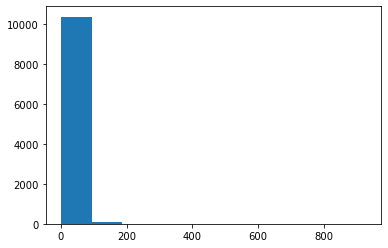

In [ ]:
plt.hist(data_forbin)
plt.show() 

Text(0.5, 1.0, 'Data Distribution')

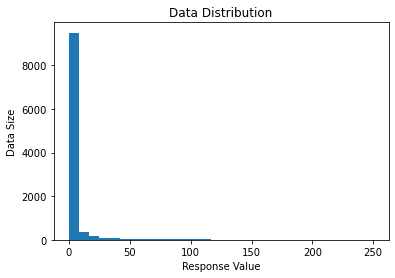

In [ ]:
plt.hist(data_forbin, 30, range=[0,250], align='mid')
plt.ylabel("Data Size")
plt.xlabel("Response Value")
plt.title("Data Distribution")

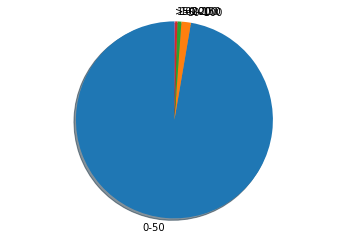

In [ ]:
import matplotlib.pyplot as plt

# resps50,resps50100,resps100150,resps150200,resps200

labels = ['0-50', '50-100', '100-150', '150-200','>=200']
sizes = [10223, 164, 68, 39, 12]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

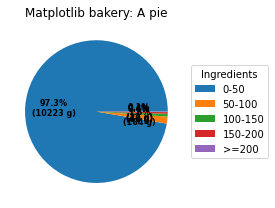

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


labels = ['0-50', '50-100', '100-150', '150-200','>=200']
# sizes = [10223, 164, 68, 39, 12]
recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [10223, 164, 68, 39, 12]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data))

ax.legend(wedges, labels,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")
plt.ylabel("")
plt.show()

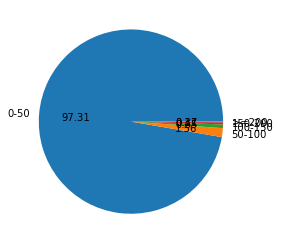

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True


labels = ['0-50', '50-100', '100-150', '150-200','>=200']
sizes = [10223, 164, 68, 39, 12]


hours = [8, 1, 11, 4]
activities = ['sleeping', 'exercise', 'studying', 'working']
# colors = ["grey", "green", "orange", "blue"]
plt.pie(sizes, labels=labels, autopct="%.2f")
plt.ylabel("")
plt.show()

In [ ]:
import plotly

In [ ]:
import plotly.graph_objects as go

labels = ['0-50', '50-100', '100-150', '150-200','>=200']
sizes = [10223, 164, 68, 39, 12]

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)

fig.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [16]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.7.4


In [17]:
model = xgboost.XGBRegressor()

In [18]:
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [37]:

# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# # load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
# dataframe = read_csv(url, header=None)
# data = dataframe.values
# # split data into input and output columns
# X, y = data[:, :-1], data[:, -1]
# # define model

# # X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# model = XGBRegressor()
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [18]:

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# split dataset into input and output columns
# X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

X, y = data[:, :-1], data[:, -1]
# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
# # define new data
# row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# new_data = asarray([row])
# # make a prediction
# yhat = model.predict(new_data)
# # summarize prediction
# print('Predicted: %.3f' % yhat)

0.9900082959180659


In [35]:
from sklearn.model_selection import GridSearchCV



In [38]:
gsc = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],},
            cv=3, scoring='r2', verbose=10, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)

# best_params = grid_result.estimators_[0].best_params_  

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [49]:
grid_result.score(X_train, y_train)


0.8384851212103563

In [60]:
grid_result.best_estimator_.score(X_train, y_train)


0.8384851212103563

In [71]:
impxg = grid_result.best_estimator_.feature_importances_
impxg

array([9.1489062e-02, 6.3318603e-02, 2.8494619e-02, 2.3254430e-02,
       1.8823959e-02, 3.4738678e-02, 1.8715225e-02, 5.0859395e-03,
       1.0904684e-04, 1.1281749e-02, 1.5310318e-02, 4.3649352e-04,
       1.1702956e-02, 1.3027483e-04, 1.6001373e-04, 5.4042248e-05,
       1.3266244e-02, 2.2270121e-02, 3.6724031e-02, 7.0264707e-03,
       1.4227025e-01, 2.6175808e-02, 1.7655056e-02, 1.5774161e-02,
       4.2146179e-03, 7.4691898e-03, 6.2756635e-02, 1.5289575e-02,
       1.3179834e-02, 2.4223641e-02, 2.4733420e-01, 1.4234524e-02,
       7.0301909e-03], dtype=float32)

In [84]:
dc = list(data_copy.columns)
dc

['temperature',
 'density',
 'resp_density',
 'metal_Ce',
 'metal_Er',
 'metal_Eu',
 'metal_Gd',
 'metal_Ho',
 'metal_In2O3',
 'metal_La',
 'metal_Nd',
 'metal_Pd',
 'metal_Pr',
 'metal_Pt',
 'metal_Rh',
 'metal_Ru',
 'metal_Sb',
 'metal_Sm',
 'metal_TiO2',
 'metal_WO3',
 'metal_Y',
 'metal_Yb',
 'metal_ox_In2O3',
 'metal_ox_TiO2',
 'metal_ox_wo3',
 'gas_cate_benzene',
 'gas_cate_ch4',
 'gas_cate_diesel_fuel',
 'gas_cate_formaldehyde',
 'gas_cate_gasoline',
 'gas_cate_h2',
 'gas_cate_toluene',
 'gas_cate_xylene',
 'resp_val']

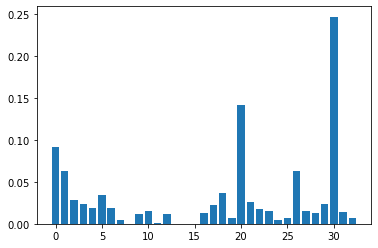

In [85]:
plt.bar(range(len(impxg)),impxg)
plt.show() 

In [91]:
imp_dic ={}
for i in range(len(dc)):
    s = dc[i].split("_")

    if i<3:
        imp_dic[dc[i]]=impxg[i]
    elif len(s)>=2 and s[0]=="metal":
        if s[0] not in imp_dic:
            imp_dic["metal"]=impxg[i]
        else:
            imp_dic["metal"]+=impxg[i]
    elif len(s)>=2 and s[0]=="gas":
        if s[0] not in imp_dic:
            imp_dic["gas"]=impxg[i]    
        else:
            imp_dic["gas"]+=impxg[i]    
            
imp_dic

{'temperature': 0.09148906,
 'density': 0.0633186,
 'resp_density': 0.028494619,
 'metal': 0.42517987,
 'gas': 0.3915178}

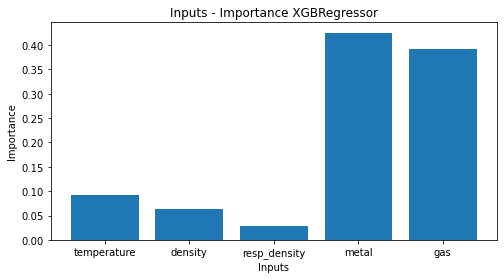

In [102]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(list(imp_dic.values()))),list(imp_dic.values()))
plt.ylabel("Importance")
plt.xlabel("Inputs")
plt.title("Inputs - Importance XGBRegressor")
plt.xticks(range(len(imp_dic.keys())),list(imp_dic.keys()))
plt.show() 

In [ ]:
# Scores = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]

# score_series = pd.Series(Scores)

# x_labels = [10, 20, 32, 44, 53, 61, 
#             70, 79, 88, 91, 105]

# # Plot the figure.
# plt.figure(figsize=(12, 8))
# fig = score_series.plot(kind='bar')
# fig.set_xticklabels(x_labels)
# fig.bar_label(fig.containers[0], label_type='edge')

In [51]:
predictions = grid_result.predict(X_test)

In [52]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

In [53]:
rmse(predictions, y_test)

26.412537775531835

In [54]:
def mean_error():
    pass

def std_error():
    pass

Text(150, 235, 'RMSE:26.412')

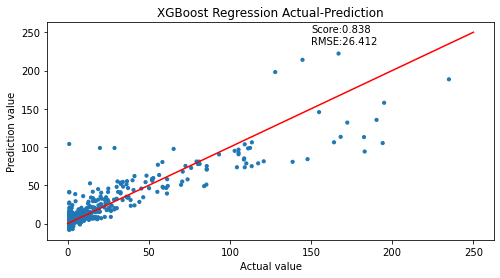

In [56]:
# Scatter
import matplotlib.pyplot as plt

# y_actual = y_test
# y_predic_rf = X_test_mlp_predict

y_predic_mlp = []
figure(figsize=(8, 4))

line_x =[0,100,200,250] 
line_y =[0,100,200,250] 
s = [10 for i in range(len(y_test))]
plt.scatter(x=y_test,y=predictions,s=s)
plt.plot(line_x,line_y,"r-")
plt.xlabel("Actual value")
plt.ylabel("Prediction value")
plt.title("XGBoost Regression Actual-Prediction")
plt.text(150, 250, "Score:0.838")
plt.text(150, 235, "RMSE:26.412")

In [22]:
from sklearn.svm import SVR
# model = SVR()
# model.fit(X_train, y_train)
# print(model.score(X_train, y_train))


In [ ]:
predictions = model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
rmse(predictions, y_test)

20.27364929082918

Text(150, 235, 'RMSE:20.273')

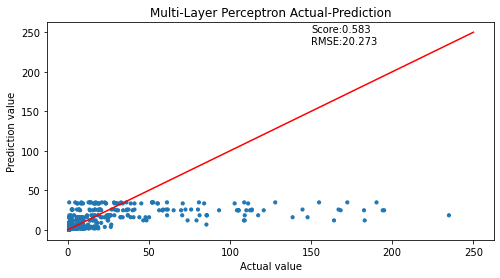

In [48]:
# Scatter
import matplotlib.pyplot as plt

# y_actual = y_test
# y_predic_rf = X_test_mlp_predict

y_predic_mlp = []
figure(figsize=(8, 4))

line_x =[0,100,200,250] 
line_y =[0,100,200,250] 
s = [10 for i in range(len(y_test))]
plt.scatter(x=y_test,y=predictions,s=s)
plt.plot(line_x,line_y,"r-")
plt.xlabel("Actual value")
plt.ylabel("Prediction value")
plt.title("Multi-Layer Perceptron Actual-Prediction")
plt.text(150, 250, "Score:0.583")
plt.text(150, 235, "RMSE:20.273")

In [24]:

param = {'kernel' : ('rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,0.1,0.5]},
# param = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#               'kernel': ['rbf', 'linear']}

grid_search = GridSearchCV(estimator =  SVR(), param_grid = param, 
                      cv = 3, n_jobs = -1, verbose = 2)
    
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


d:\Apps\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 0.1, 0.5],
                          'degree': [3, 8], 'kernel': ('rbf', 'sigmoid')},),
             verbose=2)

In [32]:
# grid_search.score(X_train, y_train)
grid_search.best_estimator_.score(X_train, y_train)



0.21541414583225127

In [26]:
predictions = grid_search.predict(X_test)

In [30]:
rmse(predictions, y_test)

20.79763287235103

Text(150, 235, 'RMSE:20.797')

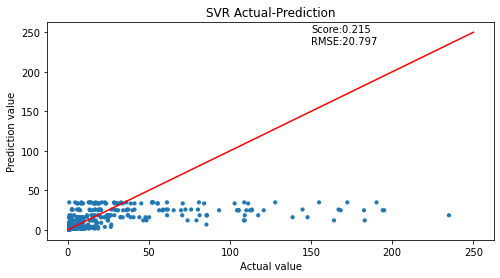

In [47]:
# Scatter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# y_actual = y_test
# y_predic_rf = X_test_mlp_predict
figure(figsize=(8, 4))

y_predic_mlp = []

line_x =[0,100,200,250] 
line_y =[0,100,200,250] 
s = [10 for i in range(len(y_test))]
plt.scatter(x=y_test,y=predictions,s=s)
plt.plot(line_x,line_y,"r-")
plt.xlabel("Actual value")
plt.ylabel("Prediction value")
plt.title("SVR Actual-Prediction")
plt.text(150, 250, "Score:0.215")
plt.text(150, 235, "RMSE:20.797")

In [41]:
# 加一个outlier counting？
# plt.scatter(x=y_train,y=predictions,s=s)
asdfa 

In [ ]:
# 结论可以围绕以下几个点展开：
# 1. 哪个模型整体效果好（性能/时间/？），为什么好；其他模型为什么不好? 为什么不好？不知道，我不是做理论的你问王鹤杰

# 2. 不同响应值区间（低中高）上，1里提到的效果好的模型一直好吗？有没有其他模型在某个区间中超过它了？为什么可以超过它？
random forest XGboost在全局都有较好的表现
为什么可以超过？不知道。建议去做interpretML，那个可以知道。